In [53]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy # spaCy for preprocessing
import pyLDAvis # Plotting tools
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import os

In [54]:
data_path="C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles"

In [55]:

file_path_folder = []
for filename in os.listdir(data_path):
    if filename.endswith('.txt'):
        file_path=os.path.join(data_path, filename)
        file_path_folder.append(file_path )
file_path_folder

['C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_1.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_10.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_11.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_12.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_2.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_3.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_4.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_5.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_6.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_7.txt',
 'C:/Users/ASUS/Desktop/Spring 2023/Text mining/Articles/Articles\\NYT_2017_ISIS_8.txt',
 'C:/Users/ASUS/De

In [56]:
#removing meta data from articles
All_Articles = []
merged_article = ''
for file_path in file_path_folder:    
    with open(file_path, encoding='utf-8-sig') as f:
        content = f.read()
        articles = content.split('\n\n\n')
        for article in articles:
            if 'All Rights Reserved' in article:
                if merged_article:
                    All_Articles.append(merged_article.strip())
                    merged_article = ''
                All_Articles.append(article.strip())
            else:
                merged_article += ' ' + article.strip()
if merged_article:
    All_Articles.append(merged_article.strip())

In [57]:
len(All_Articles)

1691

In [58]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm")
#initialize a list to store the preprocessed articles
preprocessed_corpus = []

In [60]:
#loop through each article in the corpus
for article in All_Articles:
    # tokenize the article into individual words
    tokens = simple_preprocess(article, deacc=True)

    # remove stop words
    #stop_words = set(stopwords.words("english"))
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'use','say','go','use'])
    tokens = [token for token in tokens if token not in stop_words]

    
    # lemmatize the remaining words
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]

    # rejoin the lemmatized tokens into a string
    preprocessed_article = " ".join(tokens)

   

    # add the preprocessed article to the list
    preprocessed_corpus.append(preprocessed_article)


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize the CountVectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer to the preprocessed corpus and transform the corpus
features = vectorizer.fit_transform(preprocessed_corpus)

# get the names of the features (i.e. words) in the vectorizer
feature_names = vectorizer.get_feature_names()

# count the frequency of each feature in the corpus
feature_counts = features.sum(axis=0).tolist()[0]

# create a dictionary mapping each feature to its frequency
word_frequencies = dict(zip(feature_names, feature_counts))

c:\Users\ASUS\anaconda3\envs\cis6397\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


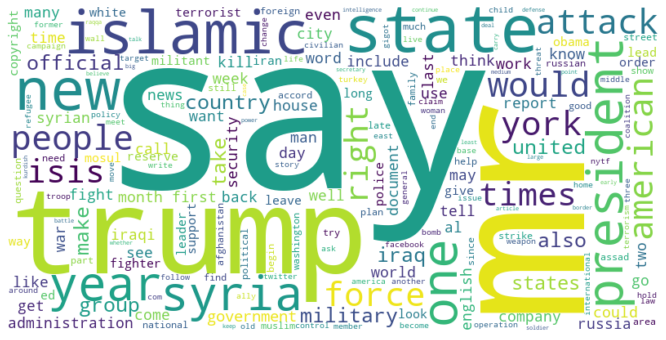

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)

# plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

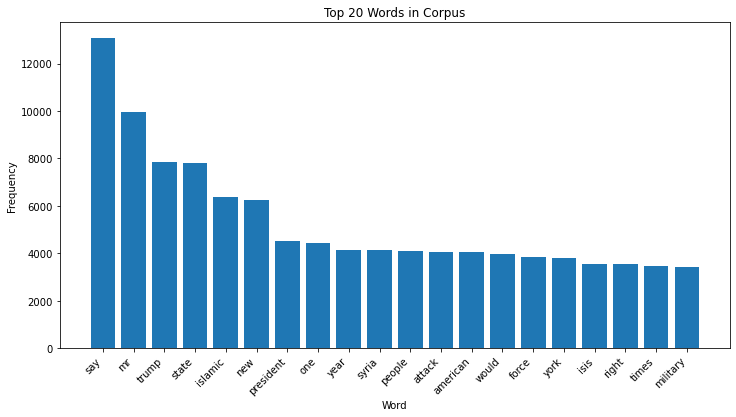

In [63]:
import pandas as pd

# create a DataFrame from the word frequencies
word_freq_df = pd.DataFrame(list(word_frequencies.items()), columns=["Word", "Frequency"])

# sort the DataFrame by frequency in descending order and select the top n rows
n = 20
top_n_words = word_freq_df.sort_values("Frequency", ascending=False).head(n)

# plot a bar chart of the top n words
plt.figure(figsize=(12, 6))
plt.bar(top_n_words["Word"], top_n_words["Frequency"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title(f"Top {n} Words in Corpus")
plt.show()

In [64]:
preprocessed_corpus

['',
 'world europe turkey hand see nearly every crisis tim arango word january nytime com feed nytfeed english copyright new york times company right reserve istanbul urkish official accuse united states abet fail coup last summer russian ambassador turkey assassinate last month turkish press say united states behind attack gunman walk istanbul nightclub early new year day kill dozen pro government news medium point finger united states merica chief suspect ne headline blare attack twitter turkish lawmaker refer name nightclub write hoever triggerman reina attack act cia period turkey confront cascade crisis seem accelerate syrian civil war spill across border event push turkey close nato ally conversely drift apart nation lash washington move close moscow work russian president vladimir putin secure cease fire syria one story turkish press base routine travel warning issue american embassy turkey united states advance knowledge nightclub attack islamic state later claim responsibilit

In [65]:
# create a dictionary from the preprocessed corpus
id2word = corpora.Dictionary([simple_preprocess(article) for article in preprocessed_corpus])

In [66]:
# create a bag-of-words representation of the corpus
corpus = [id2word.doc2bow(simple_preprocess(article)) for article in preprocessed_corpus]

print(corpus[:1])

[[]]


In [67]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100)


In [68]:

# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.011*"say" + 0.010*"mr" + 0.009*"state" + 0.007*"islamic" + 0.007*"new" + '
  '0.006*"trump" + 0.005*"attack" + 0.004*"president" + 0.004*"syria" + '
  '0.004*"military"'),
 (1,
  '0.013*"say" + 0.009*"mr" + 0.008*"trump" + 0.007*"state" + 0.006*"islamic" '
  '+ 0.005*"people" + 0.005*"new" + 0.005*"force" + 0.004*"year" + '
  '0.004*"american"'),
 (2,
  '0.010*"mr" + 0.009*"say" + 0.006*"state" + 0.006*"islamic" + 0.006*"new" + '
  '0.005*"trump" + 0.005*"one" + 0.004*"president" + 0.004*"would" + '
  '0.004*"york"'),
 (3,
  '0.015*"say" + 0.011*"mr" + 0.008*"trump" + 0.006*"new" + 0.006*"islamic" + '
  '0.005*"state" + 0.005*"president" + 0.005*"syria" + 0.005*"one" + '
  '0.004*"times"'),
 (4,
  '0.011*"say" + 0.007*"trump" + 0.006*"new" + 0.006*"mr" + 0.005*"state" + '
  '0.005*"islamic" + 0.004*"attack" + 0.004*"one" + 0.004*"times" + '
  '0.004*"year"'),
 (5,
  '0.008*"trump" + 0.008*"say" + 0.008*"mr" + 0.006*"state" + 0.005*"islamic" '
  '+ 0.005*"president" + 0.004*"o

In [69]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.339208933224631


c:\Users\ASUS\anaconda3\envs\cis6397\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
c:\Users\ASUS\anaconda3\envs\cis6397\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
c:\Users\ASUS\anaconda3\envs\cis6397\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in divide
  co_doc_prob = co_occur_count / num_docs


In [70]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.006703 -0.002294       1        1  21.405588
6      0.008252 -0.002525       2        1  19.383481
3     -0.003781 -0.005071       3        1  18.860431
1      0.002043 -0.001262       4        1  14.800537
4     -0.001187  0.008188       5        1   9.467707
0      0.002680  0.000614       6        1   8.317954
2     -0.001302  0.002351       7        1   7.764303, topic_info=        Term          Freq         Total Category  logprob  loglift
386      say  12749.000000  12749.000000  Default  30.0000  30.0000
424    state   7527.000000   7527.000000  Default  29.0000  29.0000
293      new   5934.000000   5934.000000  Default  28.0000  28.0000
283       mr   9626.000000   9626.000000  Default  27.0000  27.0000
228  islamic   6059.000000   6059.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
518     year    272.769836   4072.749922   Topic7  -5.7392  -0.1478
325   people    265.984348   3968.249307   Topic7  -5.7644  -0.1470
464     time    205.406201   2538.513021   Topic7  -6.0228   0.0413
450     take    209.525417   3126.994454   Topic7  -6.0030  -0.1473
779    group    211.479734   3253.300819   Topic7  -5.9937  -0.1777

[646 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
18807      1  0.156183       abdulgadir
18807      2  0.156183       abdulgadir
18807      3  0.312367       abdulgadir
18807      5  0.156183       abdulgadir
18807      6  0.312367       abdulgadir
...      ...       ...              ...
33640      4  0.518759  该叙利亚武装主导针对拉卡的袭击
33626      4  0.550425       这一问题去年秋天出现
33627      4  0.555379           针对这种情况
33628      4  0.546410       防止员工信息再次外泄
33641      4  0.518366               飞机

[2061 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 4, 2, 5, 1, 3])